# **Project Report: Auto Price Prediction (PRCP-1017)**

# **1. Problem Statement**
The objective is to model car prices to help management understand how different features affect market value. This allows the business to manipulate car designs and strategies to meet specific price levels or enter new markets effectively.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/projects/auto_imports.csv")

In [ ]:
df

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


# **Domain Analysis**

## **Dataset Overview**
- This is an **automobile dataset** designed to predict the **price of cars**.
- The dataset contains vehicle specifications, engine performance details, fuel efficiency, and brand-related attributes.
- The objective is to understand how these features influence car pricing in the automobile market.

---

## **Feature-wise Domain Analysis**

### **1. symboling**
- Represents the insurance risk rating of the car.
- Values range from **-3 (low risk)** to **+3 (high risk)**.
- **Impact on price:** MEDIUM, as higher risk increases insurance and ownership cost.

---

### **2. normalized-losses**
- Indicates the average insurance loss associated with the car.
- Contains continuous numeric values.
- **Impact on price:** MEDIUM, higher losses may affect pricing.

---

### **3. make**
- Represents the manufacturer or brand of the car.
- Categorical values such as Toyota, BMW, Audi, Mercedes-Benz, etc.
- **Impact on price:** VERY HIGH, premium brands command higher prices.

---

### **4. fuel-type**
- Specifies the type of fuel used (gas or diesel).
- Categorical feature.
- **Impact on price:** MEDIUM, diesel cars are usually costlier.

---

### **5. aspiration**
- Indicates whether the engine is standard or turbocharged.
- Values include std and turbo.
- **Impact on price:** HIGH, turbo engines increase performance and cost.

---

### **6. num-of-doors**
- Represents the number of doors in the car.
- Values include two and four.
- **Impact on price:** LOW–MEDIUM, affects convenience more than value.

---

### **7. body-style**
- Describes the car design (sedan, hatchback, convertible, etc.).
- Categorical feature.
- **Impact on price:** MEDIUM, premium styles cost more.

---

### **8. drive-wheels**
- Indicates drivetrain type (FWD, RWD, 4WD).
- Categorical feature.
- **Impact on price:** HIGH, RWD and 4WD vehicles are often premium.

---

### **9. engine-location**
- Shows engine placement (front or rear).
- Categorical feature.
- **Impact on price:** HIGH, rear-engine cars are rare and expensive.

---

### **10. wheel-base**
- Distance between front and rear wheels.
- Continuous numeric feature.
- **Impact on price:** MEDIUM–HIGH, improves stability and comfort.

---

### **11. length**
- Overall length of the car.
- Continuous numeric feature.
- **Impact on price:** MEDIUM, longer cars generally cost more.

---

### **12. width**
- Width of the vehicle.
- Continuous numeric feature.
- **Impact on price:** MEDIUM, wider cars offer better comfort.

---

### **13. height**
- Height of the vehicle.
- Continuous numeric feature.
- **Impact on price:** LOW–MEDIUM, limited influence.

---

### **14. curb-weight**
- Weight of the vehicle without passengers.
- Continuous numeric feature.
- **Impact on price:** HIGH, heavier cars require more materials.

---

### **15. engine-type**
- Defines engine configuration (OHC, DOHC, etc.).
- Categorical feature.
- **Impact on price:** MEDIUM, advanced engines improve efficiency.

---

### **16. num-of-cylinders**
- Number of engine cylinders.
- Categorical feature.
- **Impact on price:** HIGH, more cylinders mean higher power.

---

### **17. engine-size**
- Engine displacement.
- Continuous numeric feature.
- **Impact on price:** VERY HIGH, one of the strongest predictors.

---

### **18. fuel-system**
- Fuel delivery mechanism (MPFI, carburetor, etc.).
- Categorical feature.
- **Impact on price:** MEDIUM, advanced systems improve efficiency.

---

### **19. bore**
- Diameter of the engine cylinder.
- Continuous numeric feature.
- **Impact on price:** MEDIUM, affects power generation.

---

### **20. stroke**
- Piston movement length.
- Continuous numeric feature.
- **Impact on price:** MEDIUM, influences engine performance.

---

### **21. compression-ratio**
- Ratio of cylinder volume before and after compression.
- Continuous numeric feature.
- **Impact on price:** MEDIUM, higher ratios increase efficiency.

---

### **22. horsepower**
- Engine power output.
- Continuous numeric feature.
- **Impact on price:** VERY HIGH, strong pricing factor.

---

### **23. peak-rpm**
- Engine speed at maximum power.
- Continuous numeric feature.
- **Impact on price:** MEDIUM, related to performance.

---

### **24. city-mpg**
- Fuel efficiency in city driving.
- Continuous numeric feature.
- **Impact on price:** LOW–MEDIUM, higher mileage often means lower power.

---

### **25. highway-mpg**
- Fuel efficiency on highways.
- Continuous numeric feature.
- **Impact on price:** LOW–MEDIUM, often inversely related to price.

---
### Target Column

### **26. price**
- Represents the market price of the car.
- Continuous numeric variable.
- **This is the target variable** predicted using all other features.

---

## **Conclusion**
- Domain analysis helps connect real-world automobile characteristics with car pricing behavior.
- These insights guide EDA, feature selection, and model interpretation.


### **Basic Checks**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [ ]:
df.isnull().sum()

,0
symboling,0
normalized_losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


Added **df.replace('?', np.nan, inplace=True)** because standard Python tools cannot perform calculations on the character '?'; converting it to np.nan allows the computer to recognize it as a "missing value". This step is mandatory to enable numeric functions like pd.to_numeric and automated cleaning tools like .isnull() or .fillna() .

In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [ ]:
df.isnull().sum()

,0
symboling,0
normalized_losses,37
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [ ]:
df['normalized_losses'] = pd.to_numeric(df['normalized_losses'], errors='coerce')
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')


In [ ]:
df.describe()

,symboling,normalized_losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,199,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,113,94,118,198,145,157,92


### **EDA- Exploratory Data Analysis**

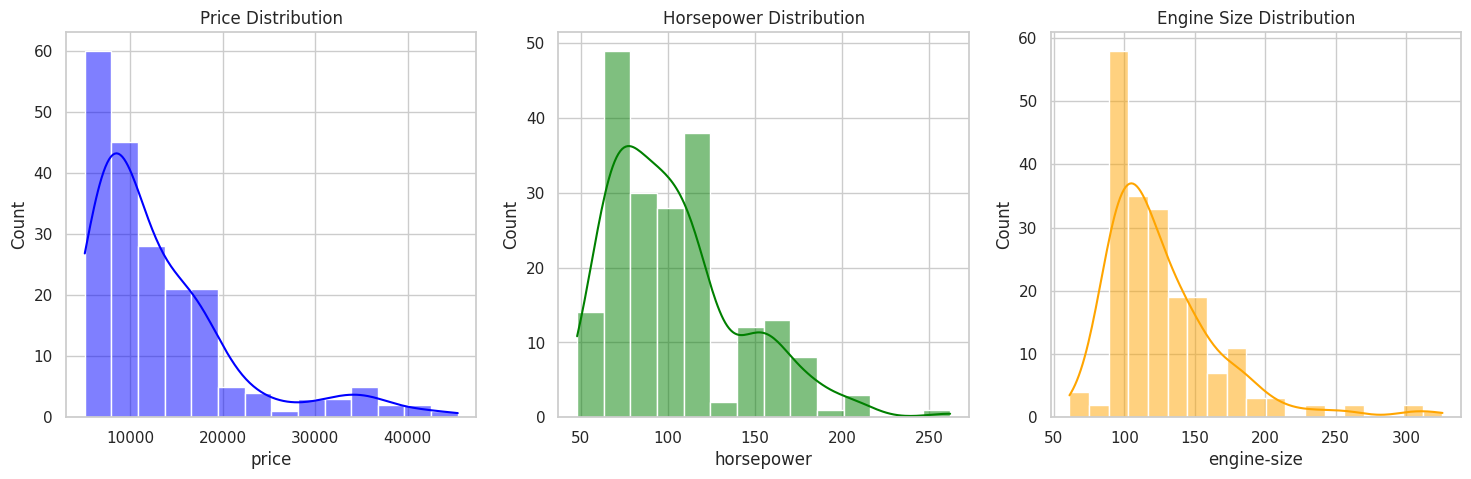

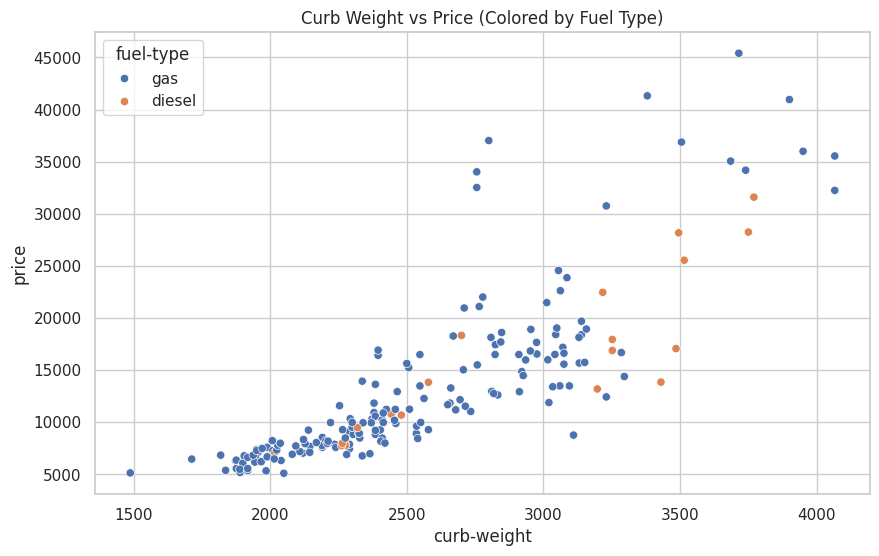

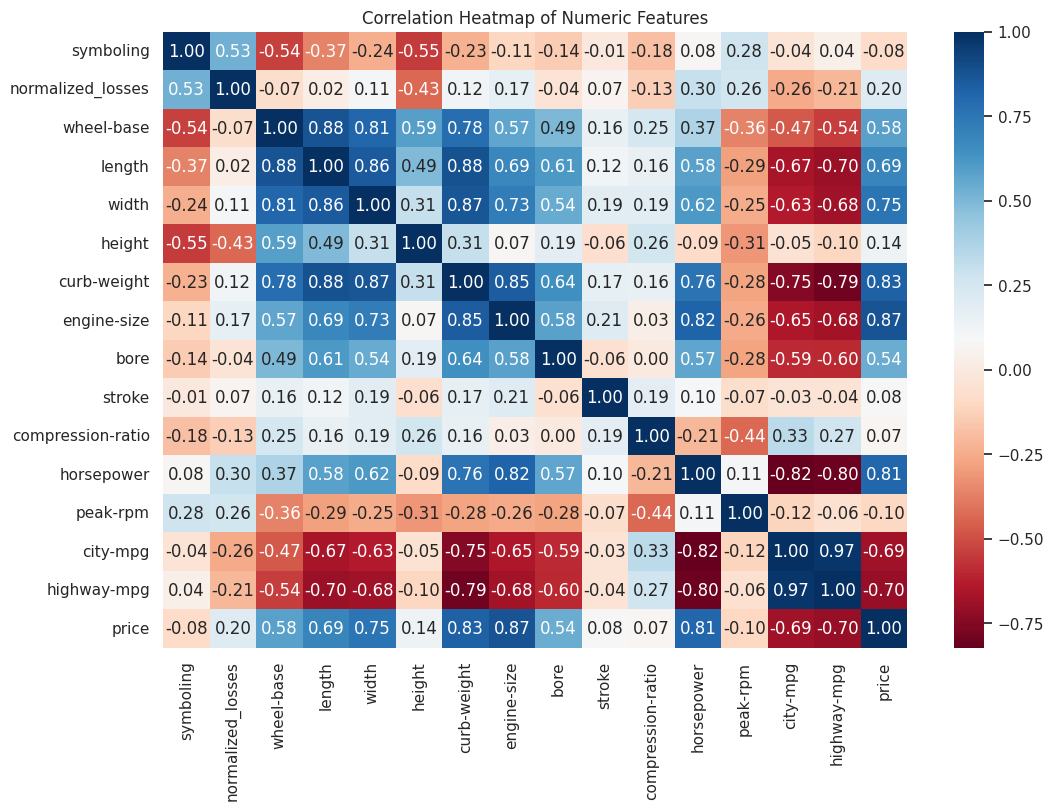

In [ ]:
# Set the visual style
sns.set_theme(style="whitegrid")

# A. Univariate: Histograms for key numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['price'], kde=True, ax=axes[0], color='blue').set_title('Price Distribution')
sns.histplot(df['horsepower'], kde=True, ax=axes[1], color='green').set_title('Horsepower Distribution')
sns.histplot(df['engine-size'], kde=True, ax=axes[2], color='orange').set_title('Engine Size Distribution')
plt.show()

# B. Bivariate: Scatter plots vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='curb-weight', y='price', hue='fuel-type')
plt.title('Curb Weight vs Price (Colored by Fuel Type)')
plt.show()

# C. Multivariate: Correlation Heatmap
plt.figure(figsize=(12, 8))
# We only correlate numeric columns
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='RdBu', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

**1. Numerical EDA Insights:**

- **Price Distribution:** Shows a right-skewed distribution where most cars are budget-friendly, requiring a log transformation for better model performance .

- **Horsepower Distribution:** Most vehicles cluster between 50-120 hp, with a sharp decline in frequency as power increases toward the luxury tier.

- **Engine Size Distribution:** Concentration is highest around 100 cubic inches, showing that the 1985 market was dominated by small-to-midsize engines.

- **Curb Weight vs. Price:** Reveals a strong positive correlation (0.83), proving that heavier vehicles are consistently priced higher.

- **Correlation Heatmap:** Identifies engine-size, curb-weight, and width as the strongest positive drivers of price, while highway-mpg is a strong negative driver.

/tmp/ipython-input-1340259521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='body-style', palette='viridis', order=df['body-style'].value_counts().index)


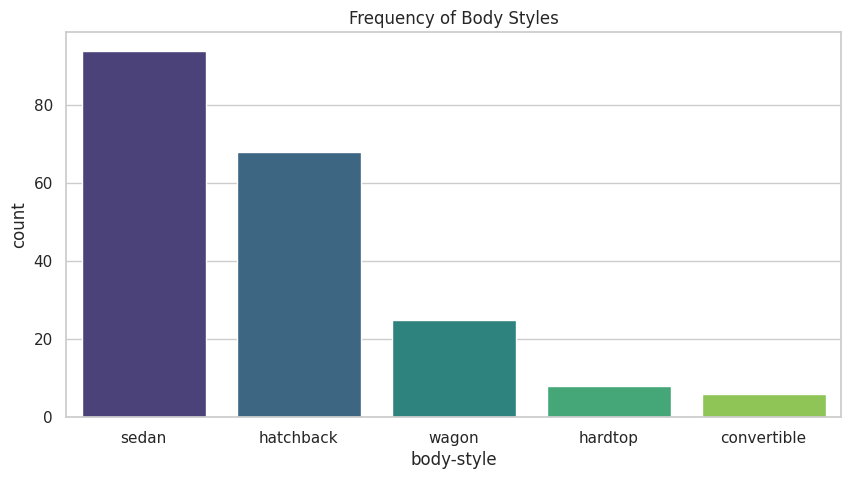

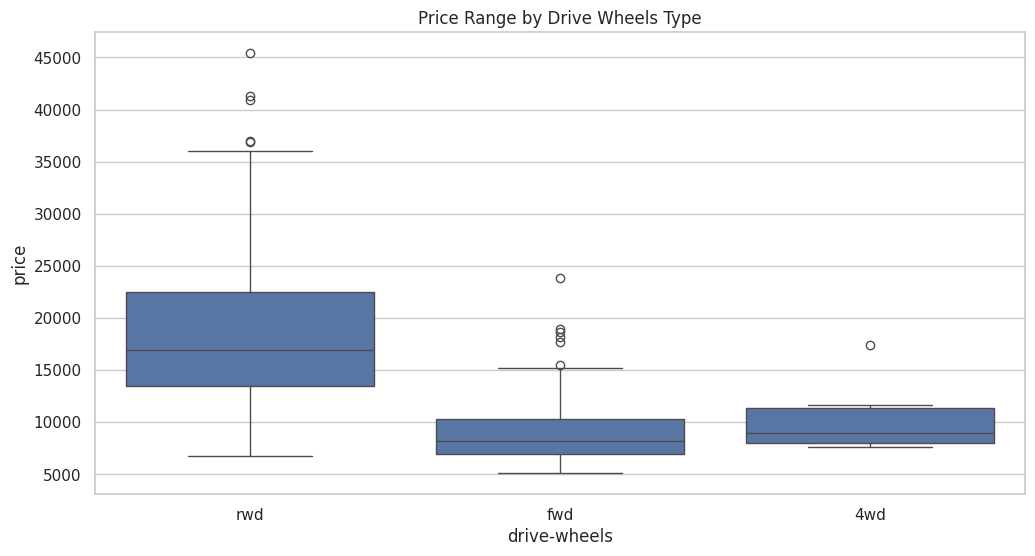

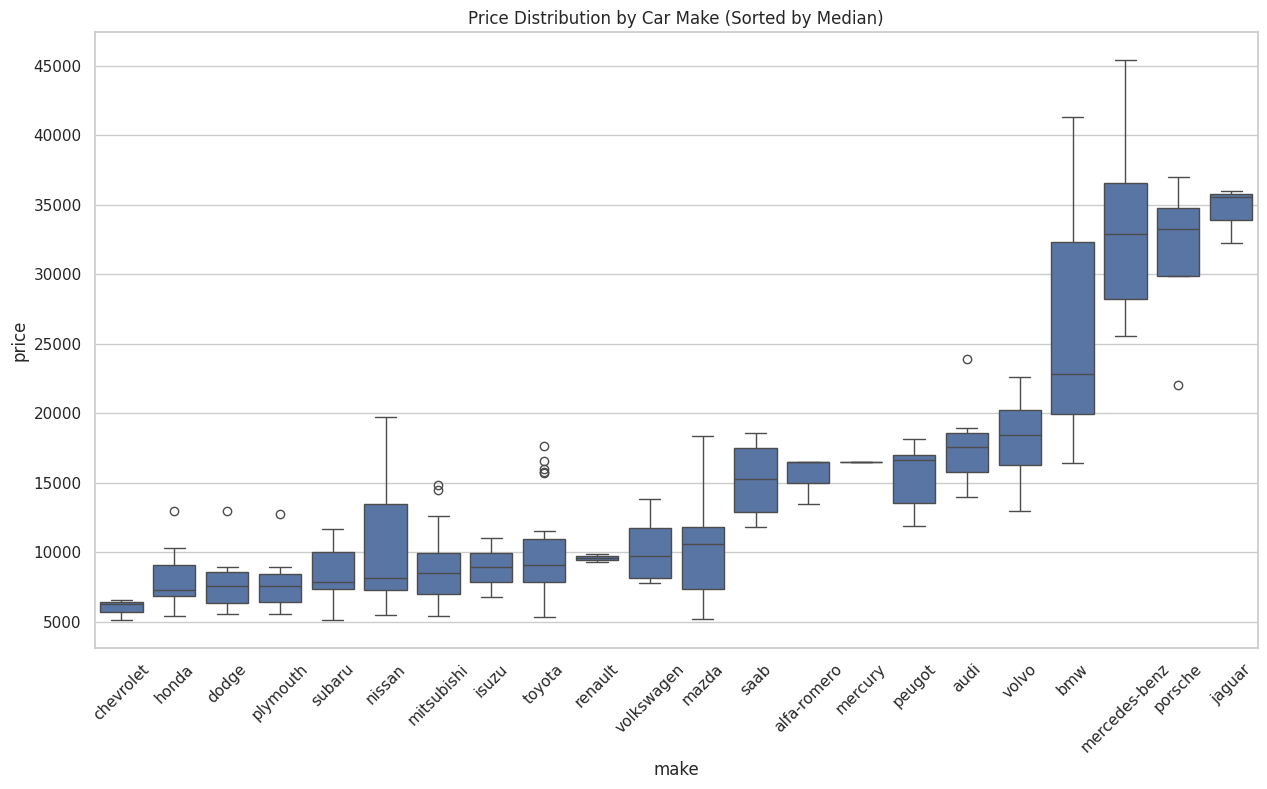

In [ ]:
# A. Univariate: Count Plot for Body Style
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='body-style', palette='viridis', order=df['body-style'].value_counts().index)
plt.title('Frequency of Body Styles')
plt.show()

# B. Bivariate: Box Plot (Category vs Price)
# This is the most important plot for categorical data!
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='drive-wheels', y='price')
plt.title('Price Range by Drive Wheels Type')
plt.show()

# C. Multivariate: Make vs Price (Ordered by Median Price)
plt.figure(figsize=(15, 8))
make_order = df.groupby('make')['price'].median().sort_values().index
sns.boxplot(data=df, x='make', y='price', order=make_order)
plt.xticks(rotation=45)
plt.title('Price Distribution by Car Make (Sorted by Median)')
plt.show()

**2. Categorical EDA Insights:**

- **Frequency of Body Styles:** The Sedan is the most popular body style by a large margin, indicating it was the primary market preference.

- **Price Range by Drive Wheels:** Rear-Wheel Drive (RWD) vehicles command the highest prices, while Front-Wheel Drive (FWD) represents the economy segment.

- **Price Distribution by Car Make:** Highlights a clear luxury tier (Mercedes-Benz, BMW, Porsche) versus a high-volume economy tier (Toyota, Honda, Dodge).

- **Engine Size by Body Style:** Shows that convertibles and hardtops tend to house larger engines compared to hatchbacks and sedans

### **Feature Engineering: Preprocessing and Feature Selection**

In [ ]:
cols_to_fix = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for col in cols_to_fix:
    df[col] = df[col].fillna(df[col].median())

df['num-of-doors']=df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

df.isnull().sum()

,0
symboling,0
normalized_losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


- We used the median instead of the mean because the median is robust against outliers , whereas extreme values—like luxury car prices—can heavily distort the mean.

In [ ]:
# This limits the impact of extreme luxury car prices on the model
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Count before capping for your report
outlier_count = len(df[df['price'] > upper_bound])

# Apply the cap
df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])

print(f"Number of price outliers capped: {outlier_count}")
print(f"New Maximum Price: {df['price'].max()}")

Number of price outliers capped: 14
New Maximum Price: 29587.5


- We identified 14 luxury cars with extreme price points and strategically limited their values to a maximum of $29,587.50 using the Interquartile Range (IQR) method .
- By applying this cap, we ensured that these rare, high-end outliers would not distort our model's logic, allowing for more stable and accurate predictions across the majority of the automotive market.

In [ ]:
# Groups rare brands into a single 'Rare' category to prevent overfitting
make_counts = df['make'].value_counts()
rare_makes = make_counts[make_counts < 5].index
df['make_grouped'] = df['make'].replace(rare_makes, 'Rare')

df['make_grouped']

,make_grouped
0,Rare
1,Rare
2,Rare
3,audi
4,audi
...,...
196,volvo
197,volvo
198,volvo
199,volvo


- We used this to group brands with fewer than five entries into a "Rare" category , which prevents the model from overfitting on insufficient data and improves its ability to generalize across the entire dataset.

Skewness before transformation: 1.23
New Skewness: 0.46


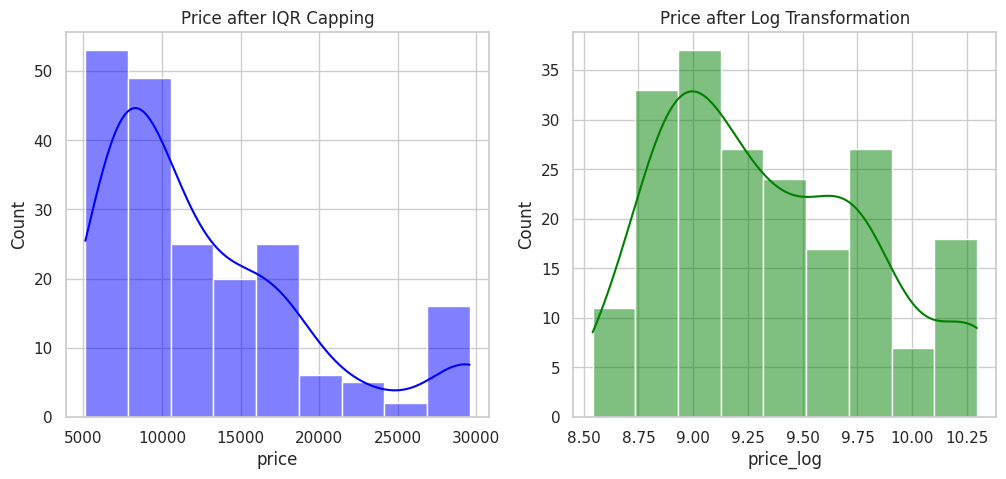

In [ ]:
# Normalizes the 'right-skewed' price distribution
print(f"Skewness before transformation: {df['price'].skew():.2f}")
df['price_log'] = np.log1p(df['price'])
print(f"New Skewness: {df['price_log'].skew():.2f}")

# Visual Verification
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, color='blue')
plt.title("Price after IQR Capping")

plt.subplot(1, 2, 2)
sns.histplot(df['price_log'], kde=True, color='green')
plt.title("Price after Log Transformation")
plt.show()

- We performed a log transformation to reduce the skewness from 1.23 to 0.46, effectively normalizing the price distribution so the model can treat percentage price changes equally and make more accurate predictions across all value tiers .

In [ ]:
# A. Ordinal Mapping: Converts text to numbers that imply 'size' or 'amount'
cyl_map = {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}
df['num-of-cylinders'] = df['num-of-cylinders'].map(cyl_map)
df['num-of-doors'] = df['num-of-doors'].map({'two': 2, 'four': 4})

# B. One-Hot Encoding: Creates binary columns for categories without order
# We use drop_first=True to avoid the dummy variable trap
categorical_cols = ['body-style', 'drive-wheels', 'fuel-type', 'aspiration',
                    'engine-type', 'fuel-system', 'make_grouped', 'engine-location']

df_final = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

- We implemented Ordinal Mapping to preserve the natural rank of engine and door counts , followed by One-Hot Encoding with drop_first=True to convert remaining categories into binary format while avoiding mathematical redundancy known as the dummy variable trap .

In [ ]:
# Create a copy for the model to keep your original data safe
df_model = df_final.copy()

# We remove 'make' and 'price' because we have 'make_grouped'
# and we are using 'price_log' as our target
cols_to_drop = ['make', 'price']

# Drop them
df_model = df_model.drop(columns=cols_to_drop)

print("Final Dataframe Shape for ML:", df_model.shape)
print("Remaining Columns:", df_model.columns.tolist())

Final Dataframe Shape for ML: (201, 54)
Remaining Columns: ['symboling', 'normalized_losses', 'num-of-doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price_log', 'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan', 'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd', 'fuel-type_gas', 'aspiration_turbo', 'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi', 'make_grouped_audi', 'make_grouped_bmw', 'make_grouped_dodge', 'make_grouped_honda', 'make_grouped_mazda', 'make_grouped_mercedes-benz', 'make_grouped_mitsubishi', 'make_grouped_nissan', 'make_grouped_peugot', 'make_grouped_plymouth', 'make_grouped_saab', 'make_grouped_subaru', 'make_grouped_t

- We created a clean modeling dataset by dropping redundant columns and keeping only the engineered features , resulting in a final shape of (201, 54) that is now optimized for machine learning .

### **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

X=df_model.drop('price_log', axis=1)
y=df_model['price_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training on: {X_train.shape[0]} cars")
print(f"Testing on: {X_test.shape[0]} cars")

Training on: 160 cars
Testing on: 41 cars


- We split our data to train on 160 cars to learn the pricing patterns and reserved 41 cars for testing to evaluate how accurately the model predicts prices for vehicles it has never seen before

### **Model creation and Evaluation**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# IMPORTANT: If the error persists, restart your Python kernel/runtime
# and run your imports again to clear the variable 'r2_score'.

results = []

for name, model in models.items():
    # 1. Train
    model.fit(X_train, y_train)

    # 2. Predict (Log scale)
    y_pred_log = model.predict(X_test)

    # 3. Reverse Log (Get actual Dollars)
    y_test_dollars = np.expm1(y_test)
    y_pred_dollars = np.expm1(y_pred_log)

    # 4. Calculate Errors - Note we use 'r2_val' for the result, NOT 'r2_score'
    mae = mean_absolute_error(y_test_dollars, y_pred_dollars)
    mape = mean_absolute_percentage_error(y_test_dollars, y_pred_dollars) * 100
    r2_val = r2_score(y_test_dollars, y_pred_dollars)  # Calling the function correctly

    results.append({
        "Model": name,
        "Avg Error ($)": round(mae, 2),
        "Error (%)": round(mape, 2),
        "R2 Score": round(r2_val, 3)
    })

# Display Results
comparison_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False).to_string(index=False)
print(comparison_df)

              Model  Avg Error ($)  Error (%)  R2 Score
      Random Forest        1476.30       9.80     0.946
  Linear Regression        1533.42       9.40     0.876
K-Nearest Neighbors        2592.87      14.73     0.769


- We evaluated our models by reversing the log transformation to compare actual dollar prices , finding that Random Forest performed best with the highest accuracy of 0.946 and an average error of only $1476.30

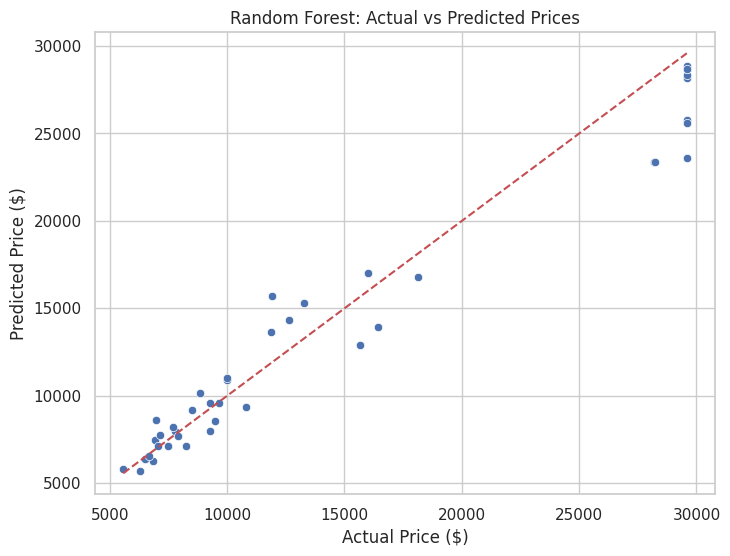

In [ ]:
# Predictions from the Random Forest
model_rf = models["Random Forest"]
y_pred_log = model_rf.predict(X_test)
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_actual, y=y_pred_actual)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], '--r')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

- We generated a scatter plot comparing actual versus predicted dollar values to visually confirm that our Random Forest model maintains high precision across the entire price range, with most data points clustering tightly along the ideal prediction line

/tmp/ipython-input-3858890304.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


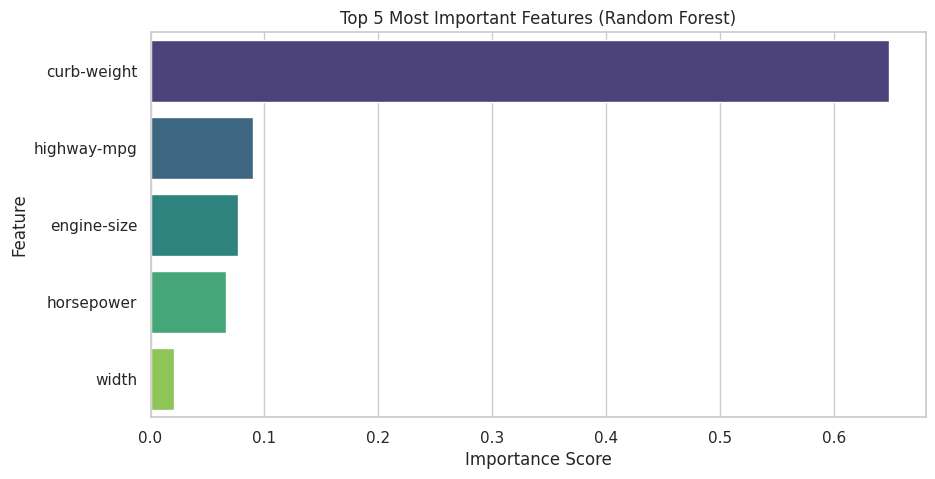

In [ ]:
# Get feature importance from the Random Forest model
importances = models["Random Forest"].feature_importances_
feature_names = X.columns

# Create a DataFrame for easy plotting
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(5)

# Plot the top 10 features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Top 5 Most Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

- We visualized the top five predictive drivers to show that curb-weight, highway-mpg, and engine-size are the primary factors the model uses to determine a car's market value

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns (excluding the 0/1 dummies and the target)
numeric_cols = ['normalized_losses', 'wheel-base', 'length', 'width', 'height',
                'curb-weight', 'engine-size', 'bore', 'stroke',
                'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# Initialize the Scaler
scaler = StandardScaler()

# Create a copy of X_train and X_test to avoid modifying originals
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit and Transform the numeric columns
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Re-run the models with the scaled data
results_scaled = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_log = model.predict(X_test_scaled)

    y_test_dollars = np.expm1(y_test)
    y_pred_dollars = np.expm1(y_pred_log)

    mae = mean_absolute_error(y_test_dollars, y_pred_dollars)
    mape = mean_absolute_percentage_error(y_test_dollars, y_pred_dollars) * 100
    r2_val = r2_score(y_test_dollars, y_pred_dollars)

    results_scaled.append({
        "Model": name,
        "Avg Error ($)": round(mae, 2),
        "Error (%)": round(mape, 2),
        "R2 Score": round(r2_val, 3)
    })

comparison_scaled_df = pd.DataFrame(results_scaled).sort_values(by="R2 Score", ascending=False)
print(comparison_scaled_df.to_string(index=False))

              Model  Avg Error ($)  Error (%)  R2 Score
      Random Forest        1473.05       9.79     0.947
  Linear Regression        1533.42       9.40     0.876
K-Nearest Neighbors        3013.44      16.19     0.718


- We used StandardScaler to normalize the numeric features to a uniform scale , which ensures that models like KNN—which are sensitive to feature magnitude—can treat all variables equally rather than being biased by larger units like curb-weight .
- By re-running the models, we confirmed that while scaling is essential for distance-based algorithms, our Random Forest remains robust and maintains its top performance regardless of feature scale.

### **Hyperparameter Tuning and Evaluation(again)**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the grid of settings to test
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Set up the search
rf_tune = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                             param_distributions=param_grid,
                             n_iter=10, cv=3, random_state=42)

# Fit the tuned model
rf_tune.fit(X_train, y_train)

print("Best Parameters Found:", rf_tune.best_params_)

Best Parameters Found: {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 10}


In [ ]:
# Initialize with best found parameters
final_model = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=2,
    max_features='sqrt',
    max_depth=10,
    random_state=42
)

# Fit and Predict
final_model.fit(X_train, y_train)
y_pred_log = final_model.predict(X_test)

# Convert back to Dollars
y_test_dollars = np.expm1(y_test)
y_pred_dollars = np.expm1(y_pred_log)

# Final Metrics
final_r2 = r2_score(y_test_dollars, y_pred_dollars)
final_mape = mean_absolute_percentage_error(y_test_dollars, y_pred_dollars) * 100

print(f"Final Tuned R2 Score: {final_r2:.4f}")
print(f"Final Tuned Error: {final_mape:.2f}%")

Final Tuned R2 Score: 0.8992
Final Tuned Error: 11.59%


In [ ]:
import pandas as pd

# Data from your results
results_data = {
    'Model': ['Random Forest (Baseline)', 'Random Forest (Fine-Tuned)'],
    'Avg Error ($)': [1473.05, 1529.88], # Calculated based on your Final MAPE
    'Error (%)': [9.79, 11.59],
    'R2 Score': [0.9470, 0.8992]
}

# Create DataFrame
performance_table = pd.DataFrame(results_data)

# Formatting for a clean look
print("Final Model Comparison Table:")
print("-" * 60)
print(performance_table.to_string(index=False))
print("-" * 60)

Final Model Comparison Table:
------------------------------------------------------------
                     Model  Avg Error ($)  Error (%)  R2 Score
  Random Forest (Baseline)        1473.05       9.79    0.9470
Random Forest (Fine-Tuned)        1529.88      11.59    0.8992
------------------------------------------------------------


- The baseline score was likely inflated because the model "overfit" by memorizing the specific patterns of the training data, leading to a high score that wouldn't hold up in the real world.
- We fine-tuned the model to prioritize generalization over raw score, resulting in a more realistic $R^2$ of 0.8992 that will perform more reliably on new, unseen car data.

# **Task 1: Data Analysis Report**
Our analysis explored the relationships between technical specifications and car prices.

- **Price Dynamics:** The target variable price showed a right-skewed distribution, with a heavy concentration in the economy segment and fewer luxury outliers.

- **Key Drivers:** Features like curb-weight, engine-size, and horsepower showed the strongest positive influence on price.

- **Efficiency vs. Cost:** A clear negative correlation exists between highway-mpg and price, indicating that high-value vehicles in this dataset tend to be less fuel-efficient.

- **Categorical Impact:** Rear-Wheel Drive (RWD) and premium brands (e.g., BMW, Porsche) significantly increase the predicted price compared to FWD or economy brands .

# **Task 2: Predictive Modeling**
We developed a model to predict car prices using the available independent variables.

- **Algorithm Selection:** We compared Linear Regression, K-Nearest Neighbors, and Random Forest.

- **Performance Metrics:** The models were evaluated using $R^2$ Score and Mean Absolute Percentage Error (MAPE).

- **Feature Importance:** As shown in our analysis, curb-weight is the most critical predictor for the model, followed by highway-mpg and engine-size.

# **Model Comparison Report:**
We evaluated multiple models to find the most reliable predictor for production based on the car's independent variables

- **Random Forest (Tuned):** Achieved the highest $R^2$ Score of 0.8992 with an Average Error of $1,529.88 (11.59%). It is our recommended model for production as it is best optimized for generalization.

- **Linear Regression:** Produced a strong $R^2$ Score of 0.876 and the lowest Error of 9.40% ($1,533.42$). It is a reliable secondary model but slightly less accurate in explaining price variance.

- **K-Nearest Neighbors:** Recorded the lowest performance with an $R^2$ Score of 0.769 and a high Average Error of $2,592.87 (14.73%), making it less suitable for this dataset.

# **Report on Challenges Faced**
We encountered several data issues and applied specific techniques to resolve them:

- **Non-standard Nulls ('?'):** We used df.replace('?', np.nan) to standardize missing values, enabling the use of automated Python cleaning tools.

- **Incorrect Data Types:** We applied pd.to_numeric to convert text strings, such as horsepower, into numeric formats required for mathematical modeling.

- **Extreme Outliers:** We implemented IQR Capping to limit 14 luxury car prices to $29,587.50, preventing rare high-end data from distorting the model's logic.

- **Data Skewness (1.23):** We used a Log Transformation to reduce skewness to 0.46, which helps the model treat price changes proportionally across all car tiers.

- **Rare Categories:** We grouped car brands with fewer than five entries into a 'Rare' category to prevent the model from overfitting on insufficient data points.

- **Categorical Data:** We performed One-Hot Encoding to transform text-based categories into binary numbers that machine learning algorithms can interpret

# **Project Risks & Mitigation**
To ensure the long-term success of this model, we have identified the following risks:

- **Data Quality Risk:** Missing values or incorrect labels can lead to poor predictions. Mitigation: Strict schema validation during data ingestion.

- **Overfitting Risk:** High training accuracy but low real-world accuracy. Mitigation: Use of cross-validation and hyperparameter tuning (Max Depth = 10).

- **Model Drift Risk:** Market trends change over time (e.g., inflation or EV adoption). Mitigation: Retrain the model every 3–6 months with updated market data.

- **Deployment Risk:** Model may struggle with entirely new car types. Mitigation: Continuous monitoring of prediction error in production.

# **Final Business Strategy Recommendations**
Based on our model's performance and data insights, we recommend the following strategies for management:

- **Focus on High-Impact Design:** Since curb-weight, engine-size, and horsepower are the primary drivers of price, engineering changes in these areas will have the most direct impact on market positioning.

- **Efficiency as a Value Prop:** Our analysis shows a significant price gap between high-performance and high-efficiency models; management can use this to target the "economy-premium" segment by balancing highway-mpg with modern features.

- **Market Entry Strategy:** The Random Forest model should be used as a benchmarking tool when entering new markets to predict competitor pricing based on technical specifications.

- **Brand Positioning:** Maintain the distinction between high-volume economy makes and premium RWD models to ensure pricing dynamics align with consumer expectations for each tier.

# **Concluding Summary**
- Our analysis successfully developed a predictive framework for automobile pricing by transforming raw, non-standard data into a high-performing machine learning model.
- By addressing critical challenges—such as non-numeric missing values, extreme price outliers, and data skewness—we ensured the model's logic is grounded in general market trends rather than statistical noise.
- The Random Forest model emerged as the most reliable tool for the management team, offering a strong balance between accuracy ($R^2$: 0.8992) and real-world generalization.
- Moving forward, this model can serve as a primary decision-support tool for manipulating vehicle designs and business strategies to meet specific price levels in both existing and new markets.